In [7]:
library(XML)
library(data.table)
library(ggplot2)

In [8]:
menURLs = 
  c("results/1999/cb99m.html","results/1999/cb99f.html","results/2012/2012cucb10m-m.htm","results/2012/2012cucb10m-f.htm"
    )
ubase = "http://www.cherryblossom.org/"
urls = paste(ubase, menURLs, sep = "")

urls[1:4]

years = c("1999_M.txt","1999_F.txt","2012_M.txt","2012_F.txt")

[1] "http://www.cherryblossom.org/results/1999/cb99m.html"       
[2] "http://www.cherryblossom.org/results/1999/cb99f.html"       
[3] "http://www.cherryblossom.org/results/2012/2012cucb10m-m.htm"
[4] "http://www.cherryblossom.org/results/2012/2012cucb10m-f.htm"

In [9]:
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "/09cucb-F.htm",
           year = 1999,  file = NULL) #sex = "male",
  {
    doc = htmlParse(url)

     if (year == "1999_F.txt" || year == "1999_M.txt" ) {#& sex == "mmale"
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]   
    } 
  
    
    else  { #if (year == 2012)
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
      file=year
    writeLines(els, con = file)
  }



In [10]:
Tables = mapply(extractResTable, url = urls, year = years)
names(Tables) = years
sapply(Tables, length)


1999_M.txt 1999_F.txt 2012_M.txt 2012_F.txt 
      3193       2359       7201       9737

In [11]:
findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
           c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
         },
         headerRow = headerRow, searchLocs = searchLocs )
}

In [12]:
# class(Values)

# colnames(Values) = shortColNames
# head(Values)

# tail(Values)[ , 1:3]

extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
show(Values)
      colnames(Values) = varNames
  
  invisible(Values)
}

In [13]:
allfilenames = paste(years[1:4],  sep = "")
allFiles = lapply(allfilenames, readLines)
names(allFiles) = years[1:4]

ResMat = lapply(allFiles, extractVariables)
length(ResMat)

sapply(ResMat, nrow)

# age = as.numeric(ResMat[['2012']][ , 'ag'])

# tail(age)

age = sapply(ResMat,
             function(x) 
                  {
                 as.numeric(x[ , 'ag'])                
                 }
            )

        [,1]                    [,2]                 [,3] [,4] [,5] [,6]     
   [1,] "Worku Bikila         " "Ethiopia          " "28" NA   NA   "  46:59"
   [2,] "Lazarus Nyakeraka    " "Kenya             " "24" NA   NA   "  47:01"
   [3,] "James Kariuki        " "Kenya             " "27" NA   NA   "  47:03"
   [4,] "William Kiptum       " "Kenya             " "28" NA   NA   "  47:07"
   [5,] "Joseph Kimani        " "Kenya             " "26" NA   NA   "  47:31"
   [6,] "Josphat Machuka      " "Kenya             " "25" NA   NA   "  47:33"
   [7,] "Julius Randich       " "Kenya             " "26" NA   NA   "  47:37"
   [8,] "Leonid Shvetsov      " "Russia            " "30" NA   NA   "  49:10"
   [9,] "Reuben Chesang       " "Kenya             " "38" NA   NA   "  49:22"
  [10,] "Daniel Kihara        " "Kenya             " "30" NA   NA   "  49:23"
  [11,] "Kibet Cherop         " "Kenya             " "24" NA   NA   "  49:26"
  [12,] "Ben Kimondieu        " "Kenya             " "21" NA   N

[1] 4

1999_M.txt 1999_F.txt 2012_M.txt 2012_F.txt 
      3191       2357       7193       9730

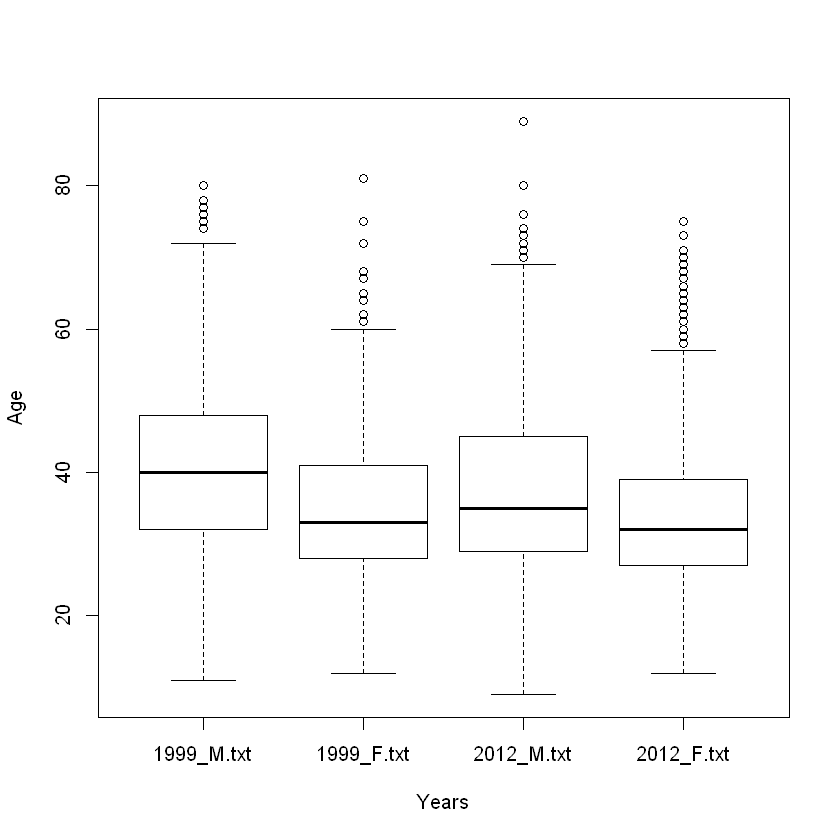

In [14]:
boxplot(age, ylab = "Age", xlab = "Years")

In [36]:
test=ResMat
ag=lapply(age, function(x) 
    {
  d=which(is.na(x))
}
)

ag

$`1999_M.txt`
[1] 1083 3191

$`1999_F.txt`
[1]    3    8   17 2175 2357

$`2012_M.txt`
[1] 7192

$`2012_F.txt`
integer(0)

In [37]:
test[['1999_M.txt']]=test[['1999_M.txt']][-c(ag$`1999_M.txt`),]
test[['1999_F.txt']]=test[['1999_F.txt']][-c(ag$`1999_F.txt`),]
test[['2012_M.txt']]=test[['2012_M.txt']][-c(ag$`2012_M.txt`),]

nrow(test[['1999_M.txt']])
nrow(test[['1999_F.txt']])
nrow(test[['2012_M.txt']])
nrow(test[['2012_F.txt']])
ResMat=test

[1] 3188

[1] 2348

[1] 7191

[1] 9730

In [38]:
charTime = ResMat[['1999_M.txt']][, 'time']
head(charTime, 5)

[1] "  46:59" "  47:01" "  47:03" "  47:07" "  47:31"

In [39]:
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

In [40]:
createDF = 
function(Res,name) #function(Res, year, sex) 
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, 'net']) )  
              Res[ , 'net']
            else if( !is.na(Res[1, 'gun']) ) 
               Res[ , 'gun']
            else 
               Res[ , 'time']
#
splitter = strsplit(name, "_")[[1]]
splitter2 = strsplit(splitter, "\\.")[[2]]
    
runTime = convertTime(useTime)
  
  Results = data.frame(year = rep(splitter[1], nrow(Res)),
                       sex = rep(splitter2[1], nrow(Res)),
                       name = Res[ , 'name'],
                       home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [41]:
# menDF = mapply(createDF, ResMat, year = years,
#                sex = rep("M", 14), SIMPLIFY = FALSE)

allDF = mapply(createDF, ResMat,names(ResMat),  SIMPLIFY = FALSE)
#menDF$'1999m.txt'
# class(menDF$'1999m.txt')
sapply(allDF, function(x) sum(is.na(x$runTime)))
sapply(allDF, function(x) sum(is.na(x$name))) 
allDF

1999_M.txt 1999_F.txt 2012_M.txt 2012_F.txt 
         0          0          0          0

1999_M.txt 1999_F.txt 2012_M.txt 2012_F.txt 
         0          0          0          0

$`1999_M.txt`
     year sex                  name               home age   runTime
1    1999   M Worku Bikila          Ethiopia            28  46.98333
2    1999   M Lazarus Nyakeraka     Kenya               24  47.01667
3    1999   M James Kariuki         Kenya               27  47.05000
4    1999   M William Kiptum        Kenya               28  47.11667
5    1999   M Joseph Kimani         Kenya               26  47.51667
6    1999   M Josphat Machuka       Kenya               25  47.55000
7    1999   M Julius Randich        Kenya               26  47.61667
8    1999   M Leonid Shvetsov       Russia              30  49.16667
9    1999   M Reuben Chesang        Kenya               38  49.36667
10   1999   M Daniel Kihara         Kenya               30  49.38333
11   1999   M Kibet Cherop          Kenya               24  49.43333
12   1999   M Ben Kimondieu         Kenya               21  49.61667
13   1999   M Jacob Kirua           Kenya               23  50.08333
14   1999   M Simon Cherogony       Kenya               27  50.28333
15   1999   M Eric Morrison         Lakewood CO         28  50.58333
16   1999   M Mark Gilmore          Columbia MD         31  50.66667
17   1999   M Phillippe Rolly       France              26  51.00000
18   1999   M Jason Bodnar          Davie FL            28  51.25000
19   1999   M Bernard Kitur         Aurora CO           27  51.28333
20   1999   M Todd Reeser           Canandaigua NY      25  51.70000
21   1999   M Chris Chattin         Columbia MD         35  52.36667
22   1999   M Andrew Klemas         Falls Church VA     35  52.41667
23   1999   M Gerry Clapper         Columbia MD         37  52.45000
24   1999   M Dave Berardi          Baltimore MD        38  52.48333
25   1999   M Gary O'donnell        Arlington VA        26  52.53333
26   1999   M Rob Magin             Gaithersburg MD     28  52.66667
27   1999   M Luis Del Aguila       State College PA    29  52.95000
28   1999   M Robert Walker         Silver Spring MD    31  53.40000
29   1999   M Bill Rodgers          Sherborn MA         51  54.05000
30   1999   M Mark Hoon             Kensington MD       34  54.21667
31   1999   M Daniel Wallace        Arlington VA        33  54.26667
32   1999   M Charlie Andrews       Rochester NY        41  54.30000
33   1999   M Jon Sushinsky         Bethesda MD         25  54.46667
34   1999   M Anthony Basile        Columbia MD         40  54.46667
35   1999   M Mark Thompson         Alexandria VA       30  54.50000
36   1999   M Patrick Reed          Annapolis MD        29  54.71667
37   1999   M Anthony Belber        Washington DC       26  54.91667
38   1999   M Todd Martin           Arlington VA        29  54.91667
39   1999   M David Mead            Bethesda MD         30  54.95000
40   1999   M Patrick Schooley      Arlington VA        28  54.98333
41   1999   M Chuck Moeser          Sterling VA         47  55.18333
42   1999   M Matt Boyd             Fredericksburg VA   28  55.28333
43   1999   M Mike Wardian          Mclean VA           24  55.45000
44   1999   M Trey Cassidy          Silver Spring MD    30  55.50000
45   1999   M Daniel Holland        Philadelphia PA     29  55.66667
46   1999   M Philippe Kozub        Bethesda MD         23  55.66667
47   1999   M James Pryde, Jr.      Churchville MD      45  55.81667
48   1999   M George Altieri        Columbia MD         41  55.83333
49   1999   M Peter Kirk            Rockville MD        42  55.85000
50   1999   M Henry Grossman        Annandale VA        27  55.86667
51   1999   M David Kent            Arlington VA        27  55.90000
52   1999   M Terry Mclaughlin      Spotsylvania VA     38  55.93333
53   1999   M Tim Francis           Rock Port MO        38  55.98333
54   1999   M Allen Mead            Fairport NY         32  56.10000
55   1999   M Stephen Koch          Shillington PA      38  56.18333
56   1999   M Rick Kern             Frederick MD        33  56.38333
57   1999   M Walter Conrad         Tampa FL         

In [42]:
tapp=
function (yy){ 
        # show(class(y)) 
        yyy = yy[ which(yy$age>=20 & yy$age <= 80), ]
        
        tx=(tapply(yyy$runTime,list(yyy$age), min))  
        #data.frame(tx)
         df = data.frame(age=names(tx),minTime=tx)   

    sss=merge(x= yyy, y= df, by= 'age', all.x= FALSE)
    #    
    sss$NormRun = (sss$runTime-sss$minTime)
    
    loessMod10 = loess(runTime ~ age, data=sss) # 10% smoothing span, span=0.10
    
    age20to80 = 20:80
    
    smoothed10 = predict(loessMod10,age20to80)
    
    smoothed10mergeage=merge(x= smoothed10, y= age20to80, by= 0, all.x= FALSE)
    
    dff=data.frame(smoothed10mergeage)
            setnames(dff, 2, "sm_time") 
            setnames(dff, 3, "age") 

    sss1=merge(x= sss, y= dff, by= 'age', all.x= F) 
    sss1$NormRuntoSmooth = (sss1$runTime/sss1$sm_time)

    plot(smoothed10 ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")
    
    return (sss1)
}


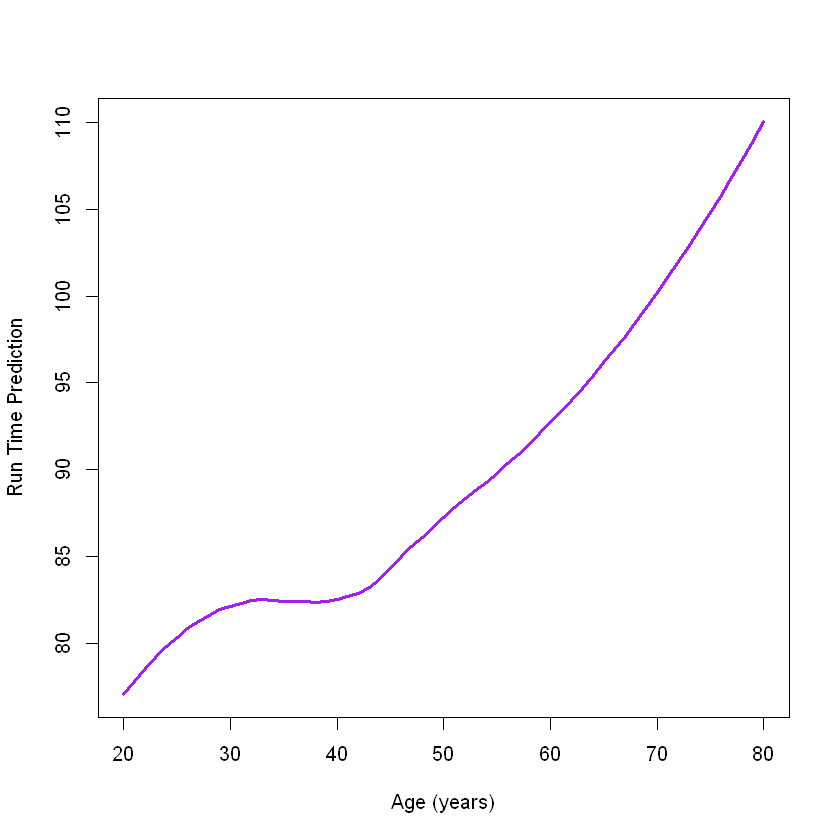

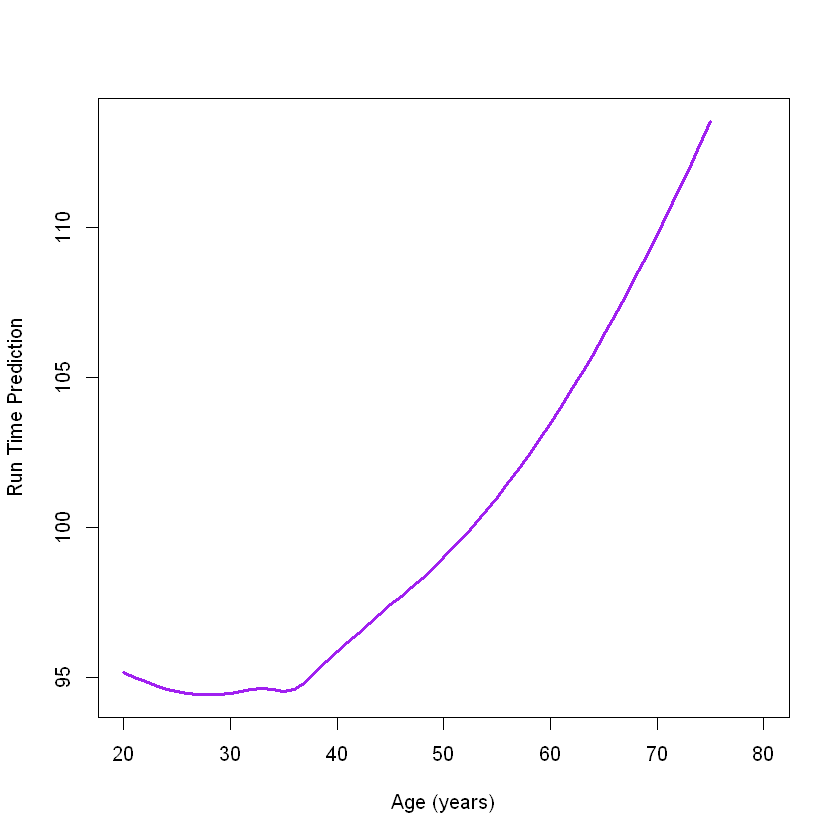

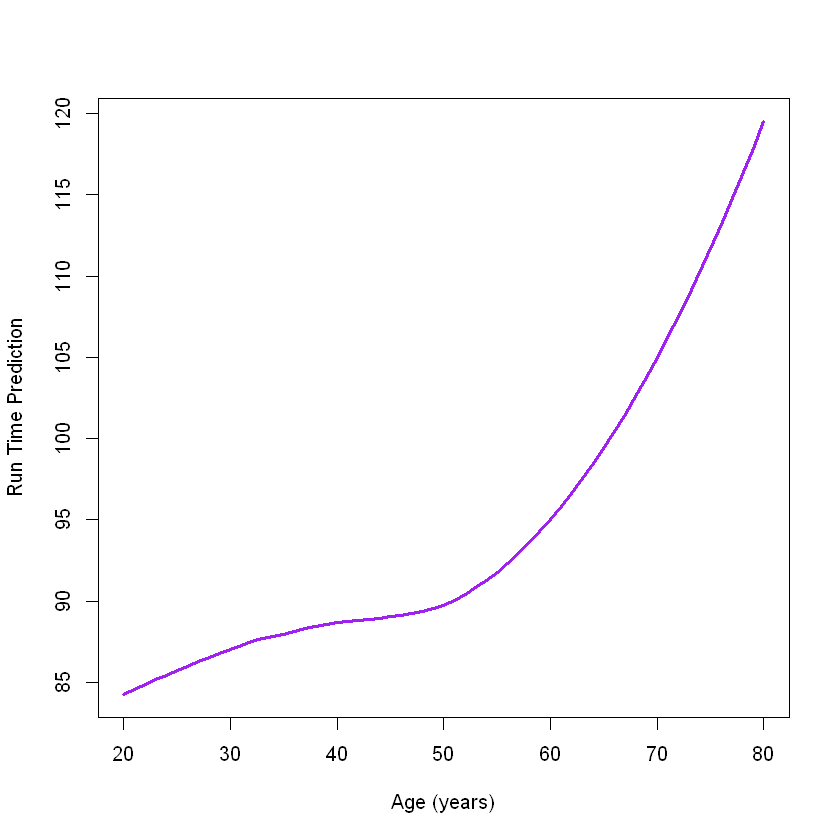

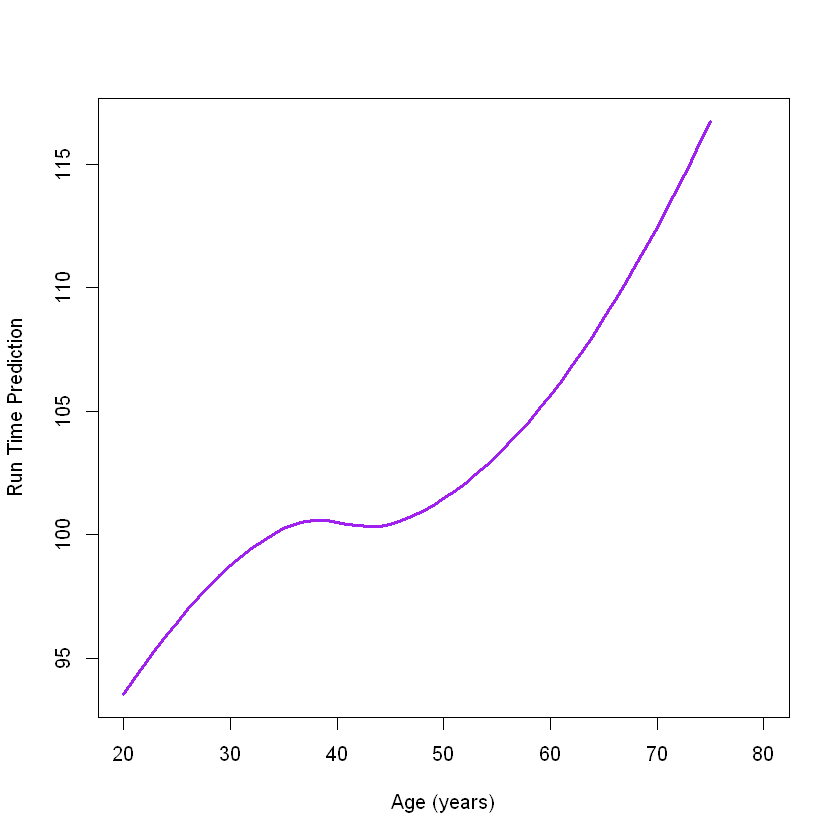

In [43]:
#allDF1 = mapply(createDF, ResMat,names(ResMat),  SIMPLIFY = FALSE)
allDF1 = mapply(tapp, allDF,  SIMPLIFY = FALSE)
#allDF1

In [44]:
allgoups = do.call(rbind, allDF1)
allgoups
nrow(allgoups)
summary(allgoups)
write.csv(allgoups, file = "MyData.csv")

age year sex name                   home                
1999_M.txt.1    20  1999 M   Gary Rovner            Washington DC       
1999_M.txt.2    20  1999 M   Jaret Seiberg          Silver Spring MD    
1999_M.txt.3    20  1999 M   Ron Varnum             Westmont NJ         
1999_M.txt.4    20  1999 M   Sam Hananel            Arlington VA        
1999_M.txt.5    20  1999 M   Michael Yonas          Washington DC       
1999_M.txt.6    20  1999 M   Nick Fede              Bear DE             
1999_M.txt.7    20  1999 M   Brady Maddox           Carlisle PA         
1999_M.txt.8    20  1999 M   Erik Taylor            Vienna VA           
1999_M.txt.9    20  1999 M   Scott Kluckhuhn        Laurel MD           
1999_M.txt.10   20  1999 M   Michael Allen          Arlington VA        
1999_M.txt.11   21  1999 M   Mark Baldino           Washington DC       
1999_M.txt.12   21  1999 M   Ben Kimondieu          Kenya               
1999_M.txt.13   21  1999 M   Devin Evert            Mclean VA           
1999_M.txt.14   21  1999 M   David Folds            Washington DC       
1999_M.txt.15   21  1999 M   Robert Kearney         Waldorf MD          
1999_M.txt.16   22  1999 M   Kyle Patterson         Rockville MD        
1999_M.txt.17   22  1999 M   Thomas Widor           Washington DC       
1999_M.txt.18   22  1999 M   Jonathan Wu            Washington DC       
1999_M.txt.19   22  1999 M   James Bernstein        Cape May NJ         
1999_M.txt.20   22  1999 M   Mark Mccormick         Mclean VA           
1999_M.txt.21   22  1999 M   Philip Sarin           Potomac MD          
1999_M.txt.22   22  1999 M   Serafin Gomez          Washington DC       
1999_M.txt.23   22  1999 M   Sam Lee                Potomac MD          
1999_M.txt.24   22  1999 M   John Renzelman         Washington DC       
1999_M.txt.25   22  1999 M   David Johnson          Chantilly VA        
1999_M.txt.26   22  1999 M   Bryce Wendel           Washington DC       
1999_M.txt.27   22  1999 M   Gerhard Lubitz         Washington DC       
1999_M.txt.28   22  1999 M   Robert Mcandrew Jr     Warrenton VA        
1999_M.txt.29   22  1999 M   Jason Mcnutt           Silver Spring MD    
1999_M.txt.30   23  1999 M   Justin Bourne          Duxbury MA          
...             ... ...  ... ...                    ...                 
2012_F.txt.9618 66  2012 F   Nancy Malan            Washington DC       
2012_F.txt.9619 66  2012 F   Rosemary Dawson        Lynchburg VA        
2012_F.txt.9620 66  2012 F   Courtenay Mullen       Fairfax VA          
2012_F.txt.9621 66  2012 F   Margie Emshoff         Chapel Hill NC      
2012_F.txt.9622 66  2012 F   Judith Nicholson       Merrimack NH        
2012_F.txt.9623 67  2012 F   Muffet Chatterton      Crofton MD          
2012_F.txt.9624 67  2012 F   Diane Fogash           Bethesda MD         
2012_F.txt.9625 67  2012 F   Susan Koehler          McLean VA           
2012_F.txt.9626 67  2012 F   Elizabeth Glover       Bethesda MD         
2012_F.txt.9627 67  2012 F   Pat Welch              Vienna VA           
2012_F.txt.9628 67  2012 F   Annie Fillare          Spotsylvania VA     
2012_F.txt.9629 67  2012 F   B J King               Crofton MD          
2012_F.txt.9630 67  2012 F   Carolyn Unger          Hamilton VA         
2012_F.txt.9631 68  2012 F   Soon Kim               Fairfax Station VA  
2012_F.txt.9632 68  2012 F   Verna Troutman         Blue Springs MO     
2012_F.txt.9633 68  2012 F   Karen Kautz            Silver Spring MD    
2012_F.txt.9634 68  2012 F   Felicity Hawes         Gaithersburg MD     
2012_F.txt.9635 68  2012 F   Dee Nelson             Gaithersburg MD     
2012_F.txt.9636 68  2012 F   Mary Stripling         Reston VA           
2012_F.txt.9637 68  2012 F   Ellie Thayer           Arlington VA        
2012_F.txt.9638 69  2012 F   Harinder Boparai       College Park MD     
2012_F.txt.9639 70  2012 F   Betty Wright-Thomas    Washington DC       
2012_F.txt.9640 70  2012 F   Rosemary Schwartzbard  Arlington VA        
2

[1] 22271

      age           year               sex                name          
 Min.   :20.0   Length:22271       Length:22271       Length:22271      
 1st Qu.:28.0   Class :character   Class :character   Class :character  
 Median :34.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :36.3                                                           
 3rd Qu.:42.0                                                           
 Max.   :80.0                                                           
     home              runTime          minTime          NormRun      
 Length:22271       Min.   : 45.25   Min.   : 45.25   Min.   :  0.00  
 Class :character   1st Qu.: 82.53   1st Qu.: 54.30   1st Qu.: 23.58  
 Mode  :character   Median : 92.77   Median : 58.83   Median : 33.53  
                    Mean   : 93.20   Mean   : 59.07   Mean   : 34.13  
                    3rd Qu.:103.14   3rd Qu.: 62.47   3rd Qu.: 43.95  
                    Max.   :170.97   Max.   :170.83   Max.   :1

In [60]:
age1999m = allgoups[ (allgoups$sex == 'M') & (allgoups$year == 1999), "NormRuntoSmooth"]
age2012m = allgoups[ (allgoups$sex == 'M') & (allgoups$year == 2012), "NormRuntoSmooth"]

age1999f = allgoups[ (allgoups$sex == 'F') & (allgoups$year == 1999), "NormRuntoSmooth"]
age2012f = allgoups[ (allgoups$sex == 'F') & (allgoups$year == 2012), "NormRuntoSmooth"]


In [61]:
summary(age1999m)
summary(age2012m)
summary(age1999f)
summary(age2012f)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5756  0.8907  0.9974  1.0007  1.1011  1.8168 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5332  0.8785  0.9885  0.9993  1.1058  1.6766 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5675  0.9146  0.9971  0.9998  1.0876  1.7430 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5524  0.9006  0.9907  0.9995  1.0881  1.6999 

In [62]:
qq=
function (arg1,arg2,name){ 
   titlee= paste("Quantile-quantile plot of", name , "runner's age", sep=" ")
qqplot(arg1, arg2, pch = 19, cex = 0.5, 
       ylim = c(0,2), xlim = c(0,2), 
       xlab = "NormRunTime in 1999 Race",
       ylab = "NormRunTime in 2012 Race", 
       main = paste("Quantile-Quantile plot of", name , "runner's age", sep=" "))
  
    abline(a =0, b = 1, col="red", lwd = 2)
    }

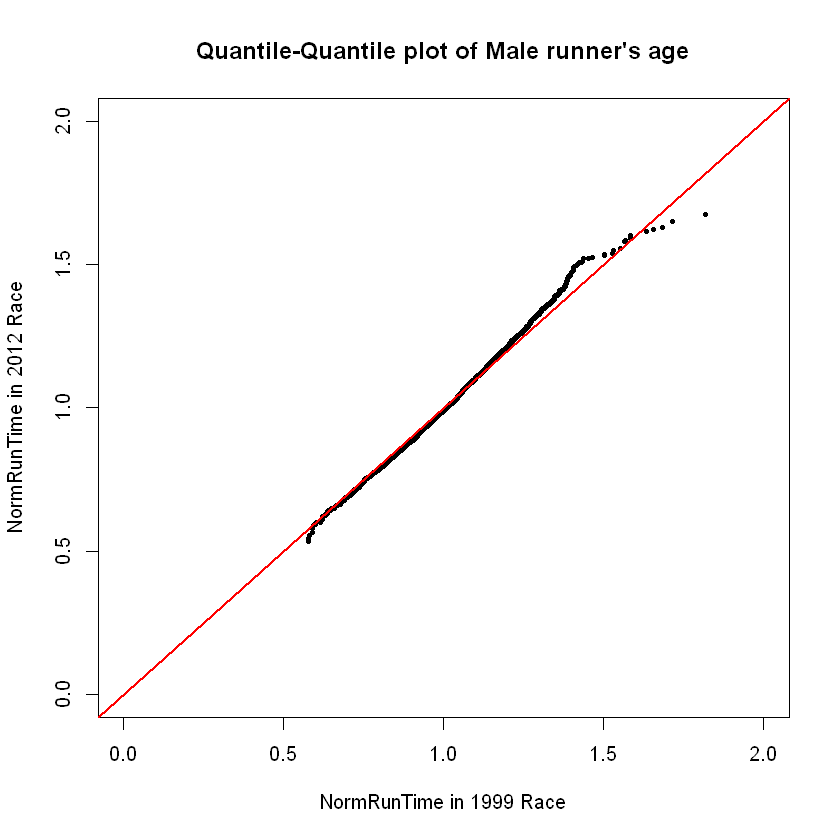

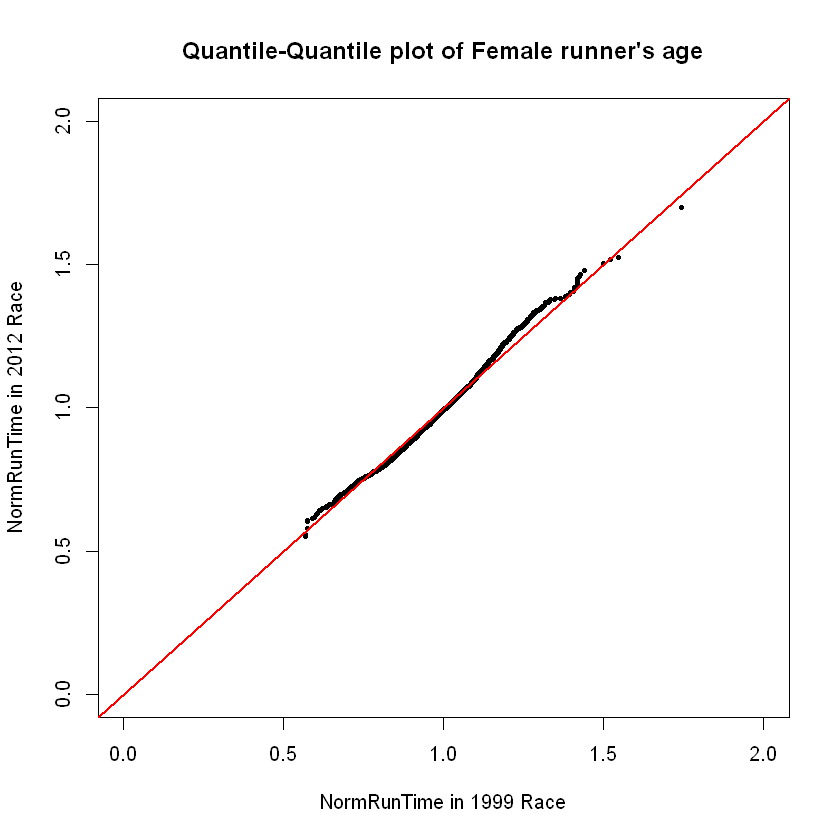

In [63]:
qq(age1999m,age2012m,'Male')
qq(age1999f,age2012f,'Female')

In [64]:
age1999m = allgoups[ (allgoups$sex == 'M') & (allgoups$year == 1999), "NormRuntoSmooth"]
age2012m = allgoups[ (allgoups$sex == 'M') & (allgoups$year == 2012), "NormRuntoSmooth"]

age1999f = allgoups[ (allgoups$sex == 'F') & (allgoups$year == 1999), "NormRuntoSmooth"]
age2012f = allgoups[ (allgoups$sex == 'F') & (allgoups$year == 2012), "NormRuntoSmooth"]

In [65]:

qqdens=
function (arg1,arg2,name){ 
plot(density(arg1, na.rm = TRUE), 
     ylim = c(0, 3.5), col = "purple",
     lwd = 3,  xlab = "Age (years)",
        main = paste("Density plot of", name , "runner's age", sep=" "))
lines(density(arg2, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

    }

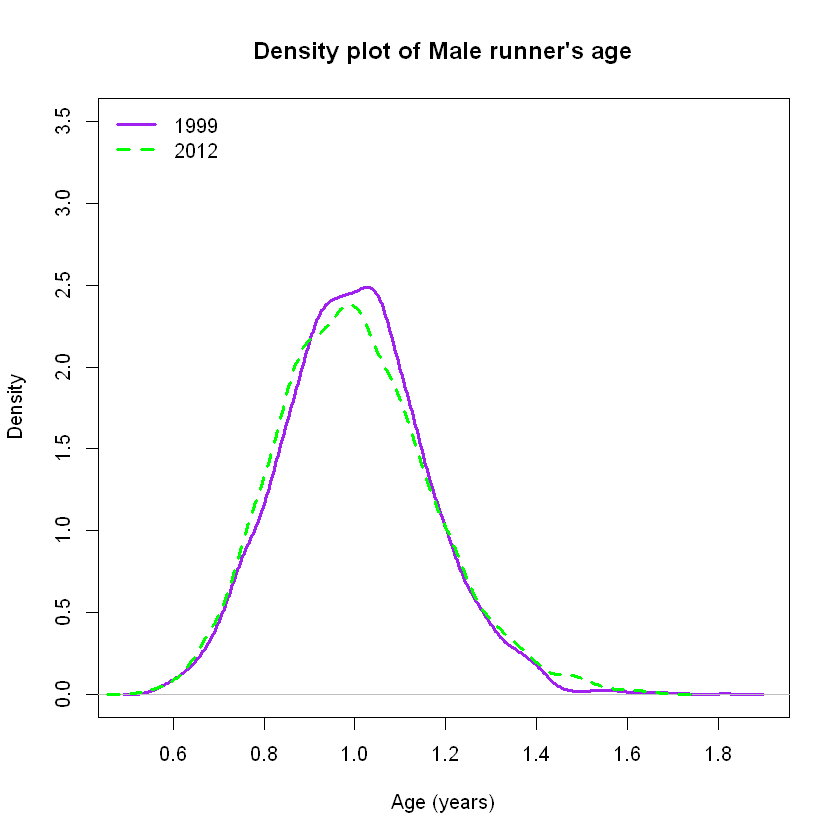

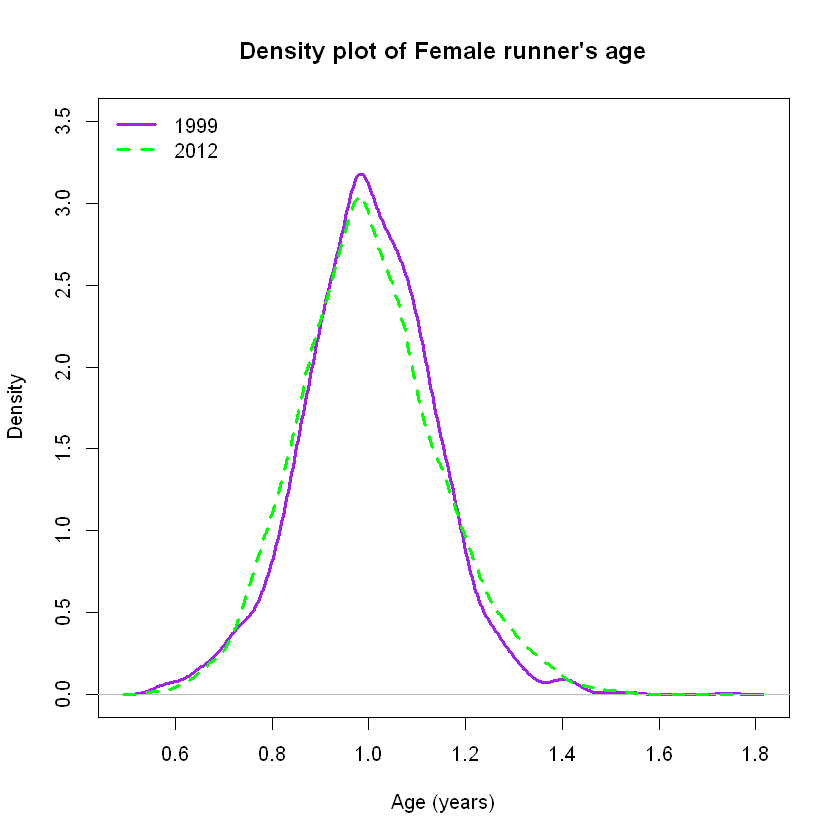

In [66]:
qqdens(age1999m,age2012m,'Male')
qqdens(age1999f,age2012f,'Female')